In [6]:
!unzip '/content/drive/MyDrive/opoint_tas2_2/archive.zip'  

Archive:  /content/drive/MyDrive/opoint_tas2_2/archive.zip
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/316px-Anne_Hathaway_@_2018.09.15_Human_Rights_Campaign_National_Dinner,_Washington,_DC_USA_06194_(43805104245)_(cropped).jpg  
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/353px-Anne_Hathaway_2019_(cropped).jpg  
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/393px-Denzel_Washington_og_Anne_Hathaway_IMG_6550b_Harry_Wad.jpg  
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/398px-Anne_Hathaway_in_2017.png  
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/417px-Anne_Hathaway_in_2016.jpg  
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/428px-Anne_Hathaway_TIFF_2008.jpg  
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/443px-Anne_Hathaway_2013.jpg  
  inflating: 14-celebrity-faces-dataset/data/train/anne_hathaway/476px-Anne_Hathaway_(cropped)_(cropped).png  
  inf

In [3]:
## !pip install mtcnn : ))) 

In [1]:
!pip install mtcnn 

     |████████████████████████████████| 2.3 MB 5.3 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
from mtcnn.mtcnn import MTCNN 
import os 

In [3]:
from sklearn.preprocessing import LabelEncoder 

In [7]:
data = []
label = []


In [ ]:
detector = MTCNN()
for f in os.listdir('/content/14-celebrity-faces-dataset/data/train') : 
  for j in os.listdir(f'/content/14-celebrity-faces-dataset/data/train/{f}') : 
    img = cv2.imread(f'/content/14-celebrity-faces-dataset/data/train/{f}/{j}'  ) 
    try : 
      faces = detector.detect_faces(img)
      for face in faces : 
        img = img[face['box'][1]:face['box'][1] + face['box'][3] , face['box'][0]:face['box'][0]+face['box'][2]]
        img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

        img = cv2.resize(img , (100,100) )
        img = img.flatten()
        img = img / 255.0 
        data.append(img)
        label.append(f)

    except : 
      continue 


In [102]:
data

[]

In [53]:
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label) 

In [54]:
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(data , label , 
                                                       test_size = 0.2 , random_state = 42 )

In [55]:
x_train[0].shape

(10000,)

In [56]:
len(x_train)

176

In [57]:
len(y_train)

176

In [84]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

classifier_svc = SVC(kernel='rbf' , C = 3  )
classifier_svc.fit(x_train , y_train )
y_prediction = classifier_svc.predict(x_test)
print('accuracy score : ' , accuracy_score(y_test , y_prediction ))

accuracy score :  0.2727272727272727


In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier_randomfarest = RandomForestClassifier(n_estimators=400 , min_samples_split=3   )
classifier_randomfarest.fit(x_train , y_train )
y_prediction_random_farest = classifier_randomfarest.predict(x_test)
print('accuracy score : ' , accuracy_score(y_test , y_prediction_random_farest ))

accuracy score :  0.3181818181818182


In [76]:
 from sklearn.neighbors import KNeighborsClassifier 
 classifier_knn = KNeighborsClassifier(n_neighbors=17)
 classifier_knn.fit(x_train , y_train )
 y_prediction_knn = classifier_knn.predict(x_test)
print('accuracy score : ' , accuracy_score(y_test , y_prediction_knn ))

accuracy score :  0.13636363636363635


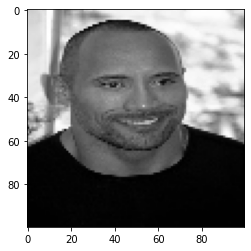

real name is :  ['dwayne_johnson']
predicted picture :  ['dwayne_johnson']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
plt.imshow(x_test[1].reshape(100,100) , cmap = 'gray' )
plt.show()
print(f'real name is : ' , label_encoder.inverse_transform([y_test[1]])   )
print('predicted picture : ' , label_encoder.inverse_transform([classifier_randomfarest.predict([x_test[1]])]))


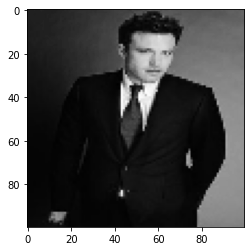

real name is :  ['ben_afflek']
predicted picture :  ['dwayne_johnson']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
plt.imshow(x_test[3].reshape(100,100) , cmap = 'gray' )
plt.show()
print(f'real name is : ' , label_encoder.inverse_transform([y_test[3]])   )
print('predicted picture : ' , label_encoder.inverse_transform([classifier_randomfarest.predict([x_test[3]])]))

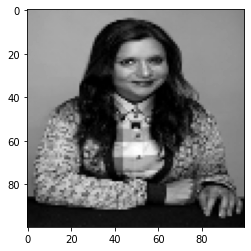

real name is :  ['mindy_kaling']
predicted picture :  ['mindy_kaling']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
plt.imshow(x_test[40].reshape(100,100) , cmap = 'gray' )
plt.show()
print(f'real name is : ' , label_encoder.inverse_transform([y_test[40]])   )
print('predicted picture : ' , label_encoder.inverse_transform([classifier_randomfarest.predict([x_test[40]])]))